In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime

In [130]:
#warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv('bitcoin_2012-01-01_to_2018-10-31.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
#df.head()

In [132]:
df_month = df.resample('M').mean() #get the mean by month
df_Q = df.resample('Q-DEC').mean() #get the mean by quarter
df_year = df.resample('A-DEC').mean() #get the mean by year

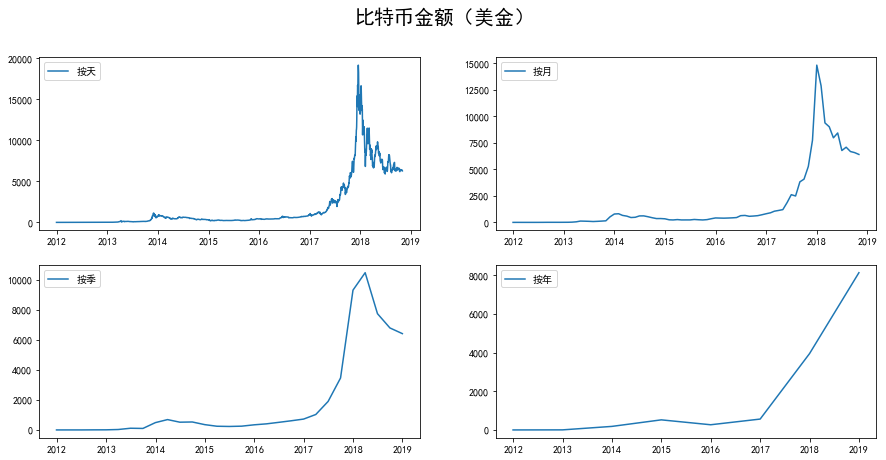

In [133]:
fig = plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif'] = ['SimHei'] #show Chinese
plt.suptitle("比特币金额（美金）", fontsize=20)

plt.subplot(221)
plt.plot(df.Weighted_Price,'-', label='按天')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price,'-',label='按月')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()

plt.show()

In [134]:
ps = range(0,3) #setup a range for p
qs = range(0,3) #setup a range for q
parameters = product(ps,qs)
parameters_list = list(parameters)
parameters_list

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [135]:
results = []
best_aic = float("inf") #infinity
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price, order=(param[0], param[1])).fit()
    except ValueError:
        print("参数错误：", param)
        continue
    aic = model.aic
    if aic<best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
#print(results)    
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table)
print('最优模型：', best_model.summary()) #get the best model

参数错误： (0, 2)
  parameters          aic
0     (0, 0)  1574.941439
1     (0, 1)  1485.999934
2     (1, 0)  1388.133932
3     (1, 1)  1385.522312
4     (1, 2)  1387.219784
5     (2, 0)  1386.505484
6     (2, 1)  1387.318997
7     (2, 2)  1389.134241
最优模型：                               ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.765
Date:                Tue, 02 Apr 2019   AIC                           1385.522
Time:                        18:06:00   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

In [136]:
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018,11,30), datetime(2018,12,31), datetime(2019,1,31),
             datetime(2019,2,28), datetime(2019,3,31), datetime(2019,4,30),
             datetime(2019,5,31),datetime(2019,6,30)]

In [137]:
future = pd.DataFrame(index=date_list, columns = df_month.columns)
df_month2 = pd.concat([df_month2, future])


In [138]:
df_month2['forecast'] = best_model.predict(start=0, end=91)

In [139]:
#df_month2.to_csv('month2.csv')

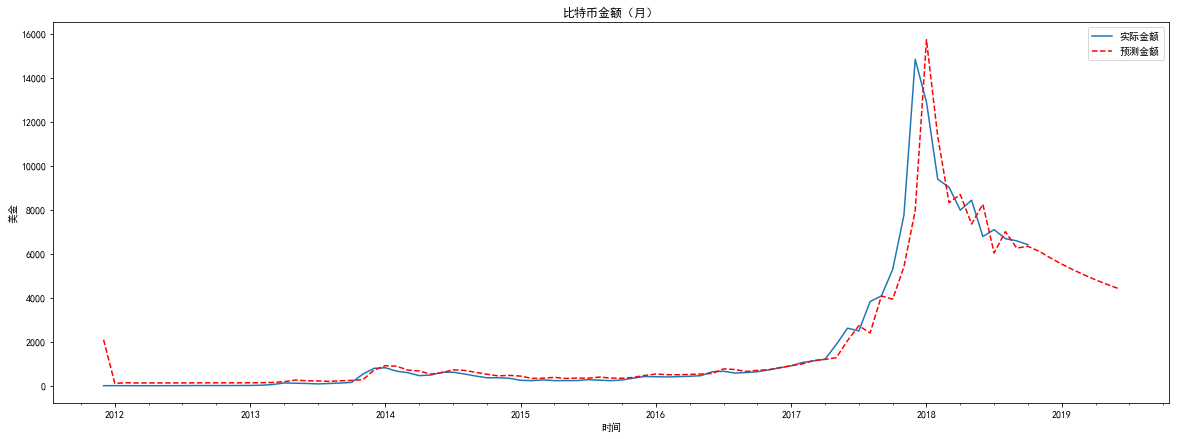

In [140]:
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()